In [2]:
#Initializing libraries
import random, copy
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from pyswarm import pso

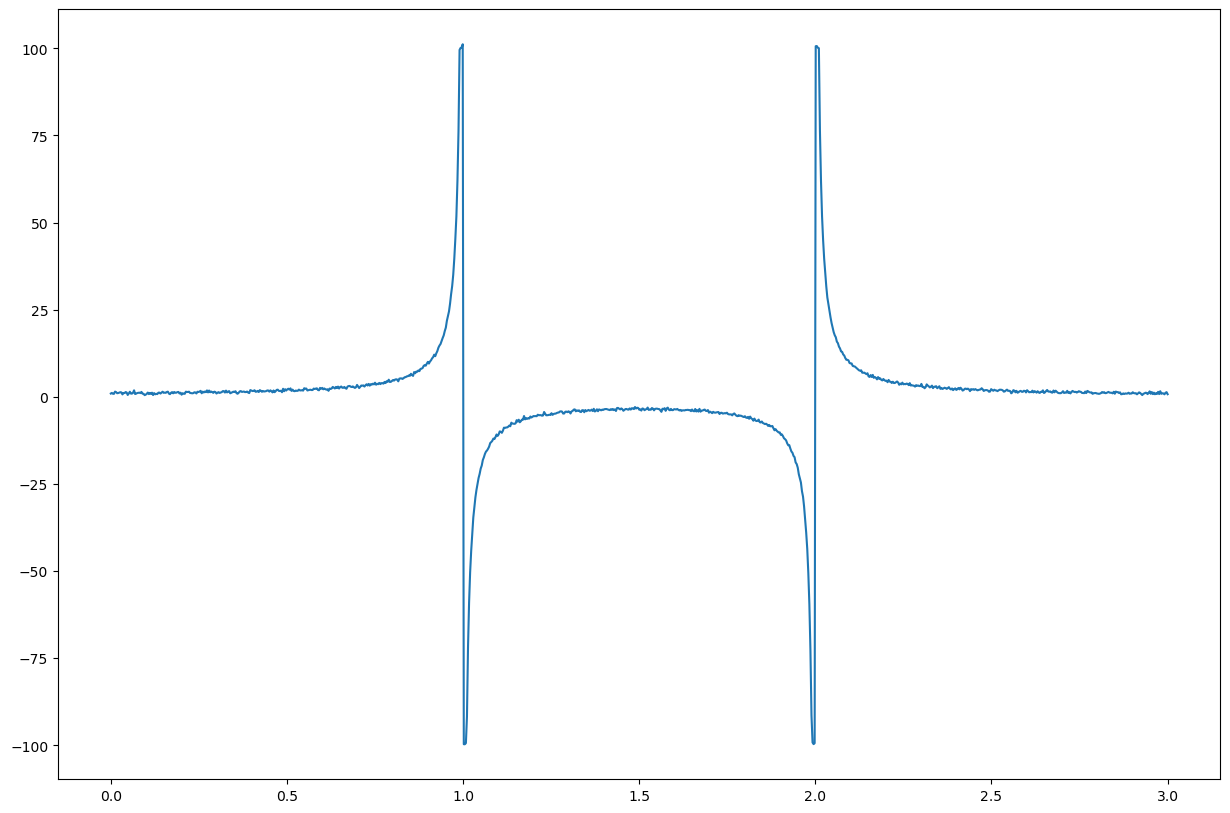

In [3]:
#Generating noisy data (x,y)
k = np.array([i for i in range(0, 1001)])
x = 3 * k / 1000
func = lambda x: 1 / (x ** 2 - 3 * x + 2)
y = func(x)

np.random.seed(12345)
for i in range(len(y)):
    if y[i] < -100:
        y[i] = -100 + np.random.normal(loc = 0.5, scale = 0.25)
    else:
        if y[i] > 100:
            y[i] = 100 + np.random.normal(loc = 0.5, scale = 0.25)
        else:
            y[i] += np.random.normal(loc = 0.5, scale = 0.25)
plt.figure(figsize=(15,10))
plt.plot(x,y)

In [4]:
#Initializating functions
def rational_function(x, a, b, c, d):
    return (a * x + b) / (x ** 2 + c * x + d)

def least_squares(vector, func, x, y):
    a, b, c, d = vector
    return np.sum((func(x, a, b, c, d) - y) ** 2)

def least_squares_lm(vector, func, x, y):
    a, b, c, d = vector
    return func(x, a, b, c, d) - y

In [5]:
# Solve the apploximation problem
# 1. Neldear-Mead method
# 2. Particle swarm optimization
# 3. Levenberg-Marquardt algorithm
# 4. Differential evolution

# 1. Neldear-Mead method
result_nm = optimize.minimize(least_squares, [1, 1, 1, 1], args = (rational_function, x, y), method = 'Nelder-Mead')
print('Nelder-Mead method: ', result_nm.x)

# 2. Particle swarm optimization
lb = [-100, -100, -100, -100]
ub = [100, 100, 100, 100]
result_pso = pso(least_squares, lb, ub, args = (rational_function, x, y))
print('Particle swarm optimization: ', result_pso[0])

# 3. Levenberg-Marquardt algorithm
result_lm = optimize.least_squares(least_squares_lm, [1, 1, 1, 1], args = (rational_function, x, y))
print('Levenberg-Marquardt algorithm: ', result_lm.x)

# 4. Differential evolution
result_de = optimize.differential_evolution(least_squares, [(0, 100), (0, 100), (0, 100), (0, 100)], args = (rational_function, x, y))
print('Differential evolution: ', result_de.x)


Nelder-Mead method:  [-0.99888235  0.99937991 -2.00089809  1.00091411]
Stopping search: maximum iterations reached --> 100
Particle swarm optimization:  [-97.93557912  82.18300578  75.09368456 -76.1316012 ]
Levenberg-Marquardt algorithm:  [-1.00110604  1.00168408 -2.00120374  1.00122   ]
Differential evolution:  [ 0.         27.18858474 83.89136754 13.31391854]


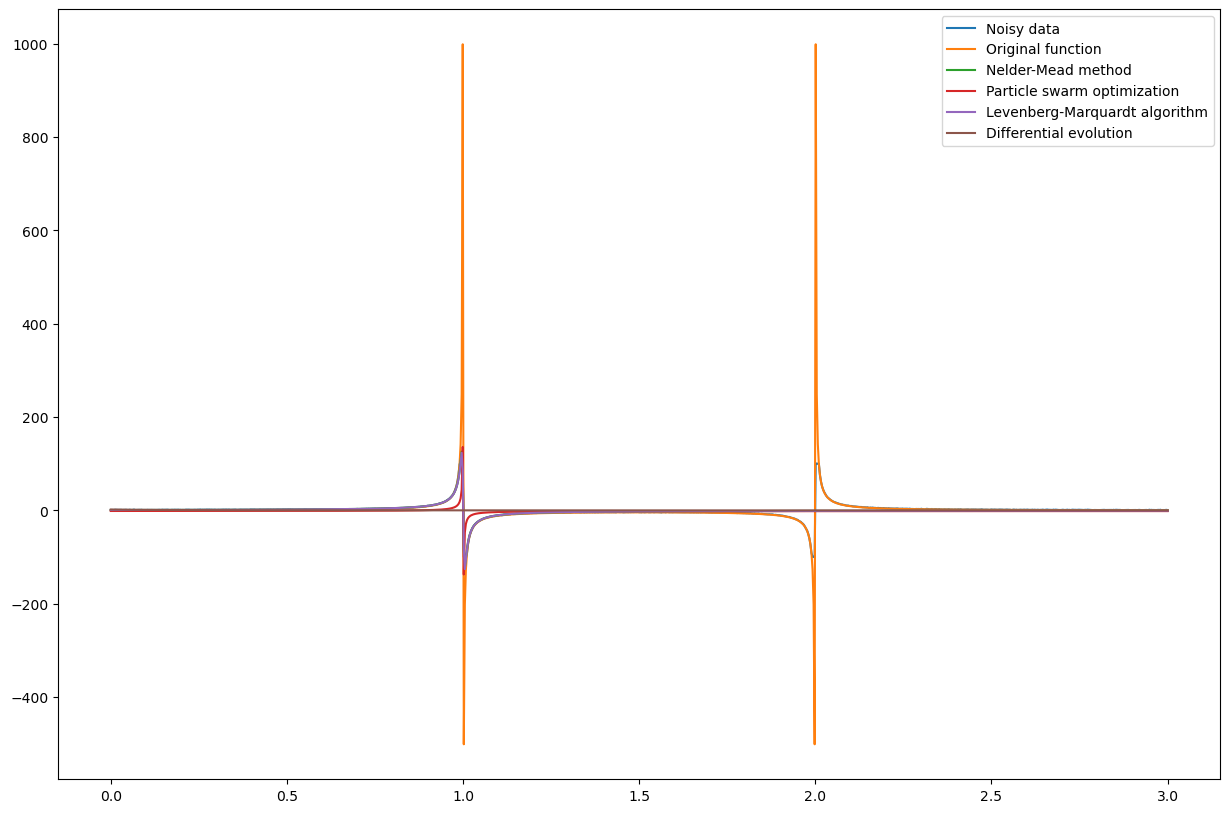

In [6]:
# Plotting the results
plt.figure(figsize=(15,10))
plt.plot(x, y, label = 'Noisy data')
plt.plot(x, func(x), label = 'Original function')
plt.plot(x, rational_function(x, *result_nm.x), label = 'Nelder-Mead method')
plt.plot(x, rational_function(x, *result_pso[0]), label = 'Particle swarm optimization')
plt.plot(x, rational_function(x, *result_lm.x), label = 'Levenberg-Marquardt algorithm')
plt.plot(x, rational_function(x, *result_de.x), label = 'Differential evolution')
plt.legend()
plt.show()
